# Perform Analysis for the Raw Data

## Import Modules

In [3]:
import matplotlib.pyplot as plt
import missingno as msno 
import numpy as np
import pandas as pd
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import seaborn as sns

### Load the data

In [4]:
# Load the Chicago taxi dataset as a pandas dataframe for ease of use
chicago_taxi_df = pd.read_csv("https://download.mlcc.google.com/mledu-datasets/chicago_taxi_train.csv")

----
### Examining the data

----

* chicago_taxi_df.shape
    * reveals 
        * Rows: 31694
        * Columns: 18

In [11]:
chicago_taxi_df.shape

(31694, 18)

In [5]:
# Have a look at the dataframe
chicago_taxi_df.head(5)

,TRIP_START_TIMESTAMP,TRIP_END_TIMESTAMP,TRIP_START_HOUR,TRIP_SECONDS,TRIP_MILES,TRIP_SPEED,PICKUP_CENSUS_TRACT,DROPOFF_CENSUS_TRACT,PICKUP_COMMUNITY_AREA,DROPOFF_COMMUNITY_AREA,FARE,TIPS,TIP_RATE,TOLLS,EXTRAS,TRIP_TOTAL,PAYMENT_TYPE,COMPANY
0,05/17/2022 7:15:00 AM,05/17/2022 7:45:00 AM,7.25,2341,2.57,4.0,NaN,NaN,NaN,17.0,31.99,2.0,6.3,0.0,0.0,33.99,Mobile,Flash Cab
1,05/17/2022 5:15:00 PM,05/17/2022 5:30:00 PM,17.25,1074,1.18,4.0,NaN,1.703108e+10,NaN,8.0,9.75,3.0,27.9,0.0,1.0,14.25,Credit Card,Flash Cab
2,05/17/2022 5:15:00 PM,05/17/2022 5:30:00 PM,17.25,1173,1.29,4.0,1.703132e+10,1.703108e+10,32.0,8.0,10.25,0.0,0.0,0.0,0.0,10.25,Cash,Sun Taxi
3,05/17/2022 6:00:00 PM,05/17/2022 7:00:00 PM,18.00,3360,3.70,4.0,1.703132e+10,1.703124e+10,32.0,24.0,23.75,0.0,0.0,0.0,1.0,24.75,Cash,Choice Taxi Association
4,05/17/2022 5:00:00 PM,05/17/2022 5:30:00 PM,17.00,1044,1.15,4.0,1.703132e+10,1.703108e+10,32.0,8.0,10.00,0.0,0.0,0.0,0.0,10.00,Cash,Flash Cab


* I observe that all of the columns are all upper case and use underscores
* I will change these values to be lower case


In [7]:
# Make column names lower case
chicago_taxi_df.columns = chicago_taxi_df.columns.str.lower()   

In [8]:
chicago_taxi_df.columns

Index(['trip_start_timestamp', 'trip_end_timestamp', 'trip_start_hour',
       'trip_seconds', 'trip_miles', 'trip_speed', 'pickup_census_tract',
       'dropoff_census_tract', 'pickup_community_area',
       'dropoff_community_area', 'fare', 'tips', 'tip_rate', 'tolls', 'extras',
       'trip_total', 'payment_type', 'company'],
      dtype='object')

#### Checking Missing values

- I see missing values from `chicago_taxi_df.isnull().sum()` only for:
* pickup_census_tract : 18435 missing values
* dropoff_census_tract : 17671 missing values
* pickup_community_area : 3217 missing values
* dropoff_community_area : 3495 missing values

Looking at the fields, I don't believe I will need these values for the model

- I include a visualization as well as a quick visual sanity check

In [9]:
chicago_taxi_df.isnull().sum()

trip_start_timestamp          0
trip_end_timestamp            0
trip_start_hour               0
trip_seconds                  0
trip_miles                    0
trip_speed                    0
pickup_census_tract       18435
dropoff_census_tract      17671
pickup_community_area      3217
dropoff_community_area     3495
fare                          0
tips                          0
tip_rate                      0
tolls                         0
extras                        0
trip_total                    0
payment_type                  0
company                       0
dtype: int64

<Axes: >

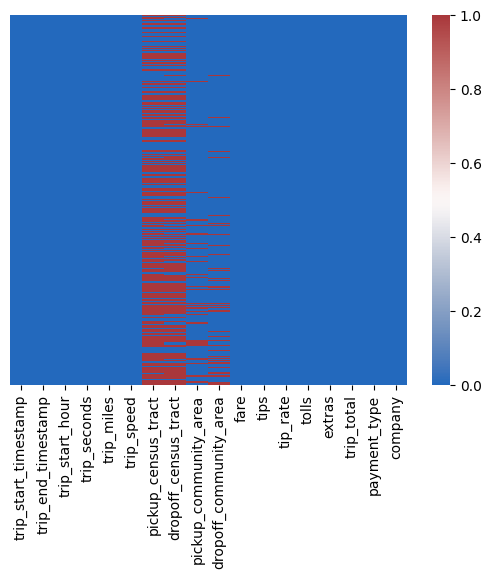

In [13]:
# Visualization 
sns.heatmap(chicago_taxi_df.isnull(), yticklabels=False, cbar=True, cmap='vlag')

<Axes: >

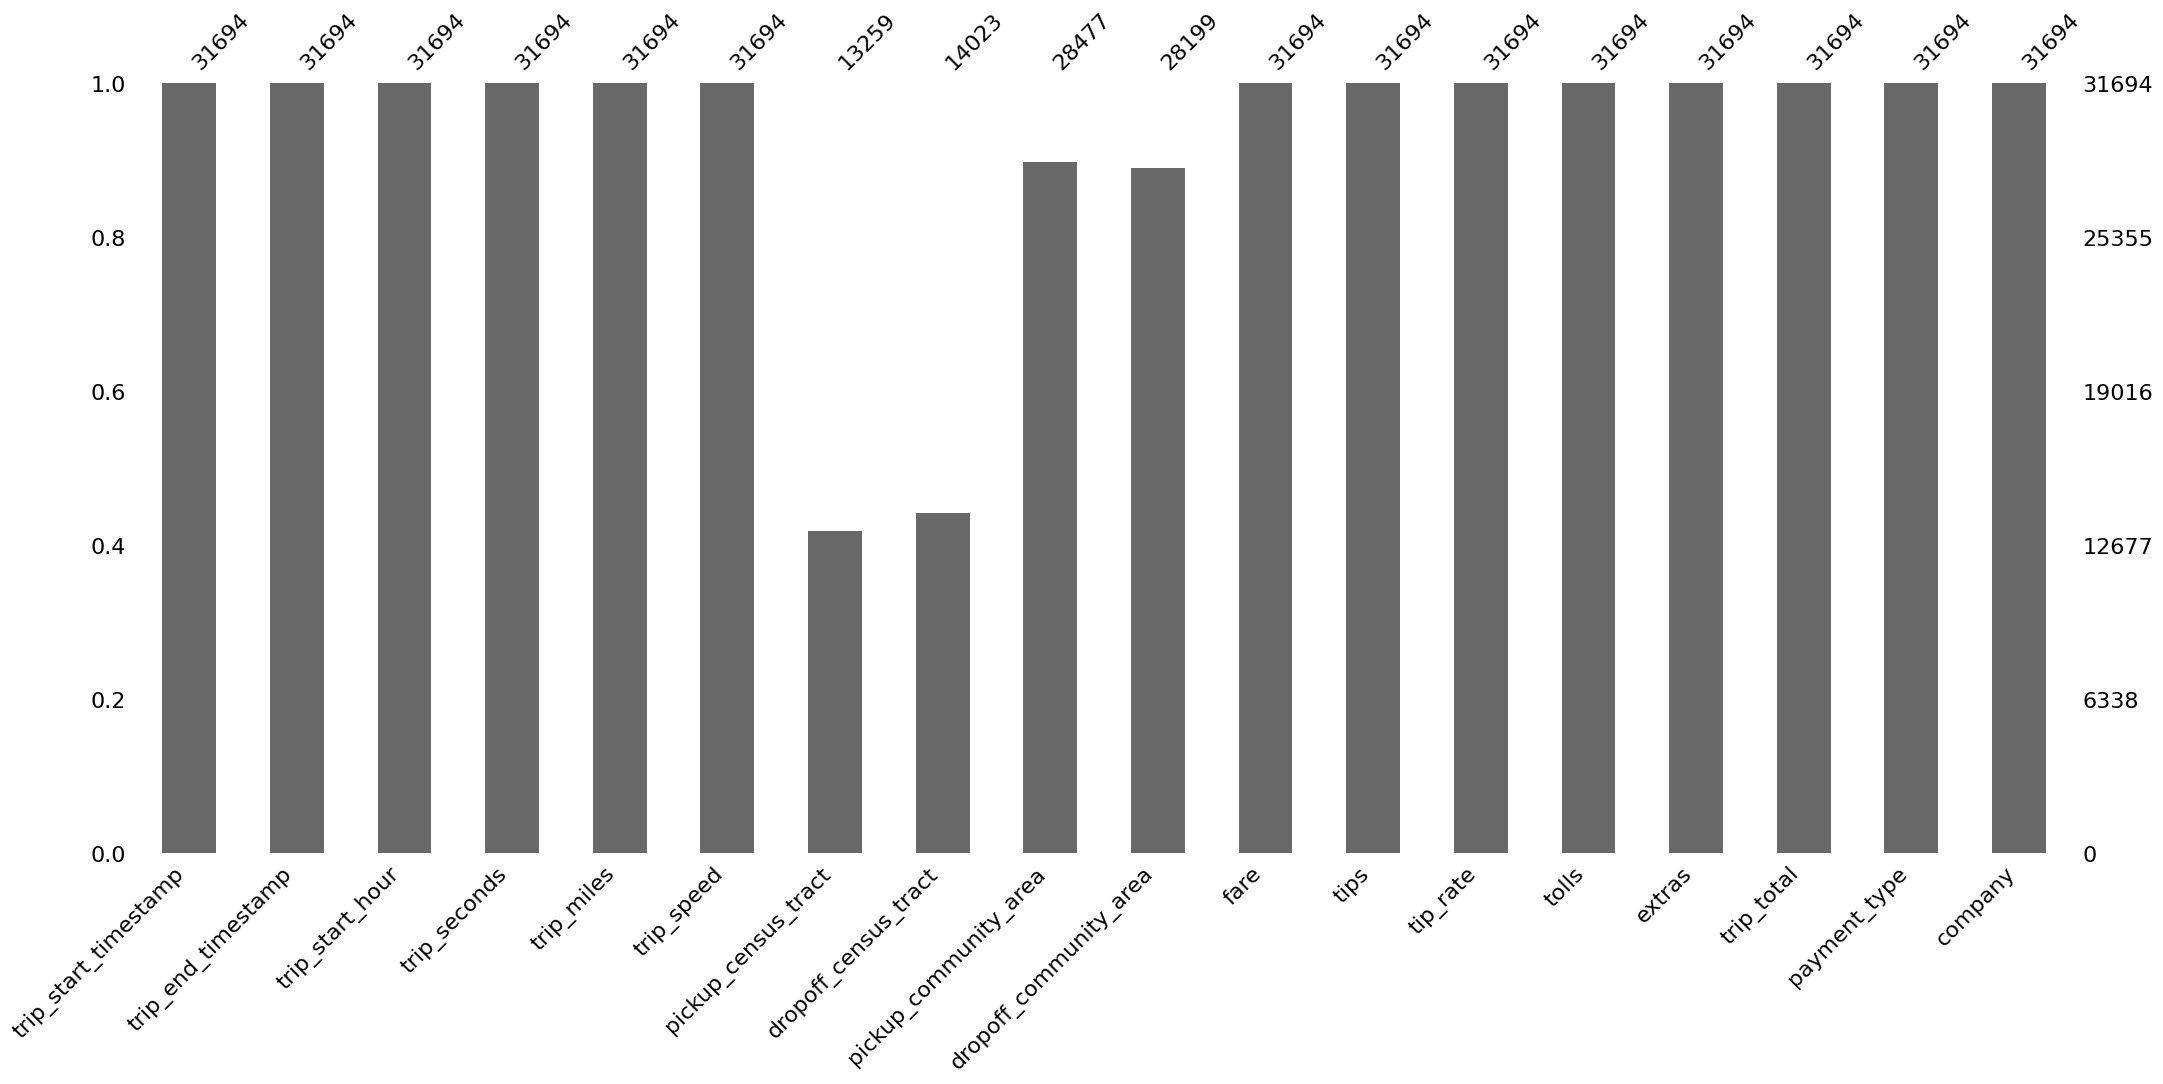

In [14]:
#Visualize the missing values
msno.bar(chicago_taxi_df)

#### Checking Duplicates

Result:

I do not have any rows that are duplicated so that is good to know 

In [15]:
chicago_taxi_df.duplicated().sum()

np.int64(0)

#### Checking Data Type

Result

- Shows all of the lowercase and underscore changes were made
- confirms the missing values for certain columns
- Shows that we have 
    *  4 categorical features
    *  14 numeric features (13-float64 and 1-Int64)

In [16]:
# data types
chicago_taxi_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31694 entries, 0 to 31693
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   trip_start_timestamp    31694 non-null  object 
 1   trip_end_timestamp      31694 non-null  object 
 2   trip_start_hour         31694 non-null  float64
 3   trip_seconds            31694 non-null  int64  
 4   trip_miles              31694 non-null  float64
 5   trip_speed              31694 non-null  float64
 6   pickup_census_tract     13259 non-null  float64
 7   dropoff_census_tract    14023 non-null  float64
 8   pickup_community_area   28477 non-null  float64
 9   dropoff_community_area  28199 non-null  float64
 10  fare                    31694 non-null  float64
 11  tips                    31694 non-null  float64
 12  tip_rate                31694 non-null  float64
 13  tolls                   31694 non-null  float64
 14  extras                  31694 non-null

#### Checking Categorical and Numerical Attributes

In [17]:
numeric_cols = chicago_taxi_df.select_dtypes(include = "number").columns
print(numeric_cols)

Index(['trip_start_hour', 'trip_seconds', 'trip_miles', 'trip_speed',
       'pickup_census_tract', 'dropoff_census_tract', 'pickup_community_area',
       'dropoff_community_area', 'fare', 'tips', 'tip_rate', 'tolls', 'extras',
       'trip_total'],
      dtype='object')


In [18]:
cat_cols = chicago_taxi_df.select_dtypes(include = "object").columns
print(cat_cols)

Index(['trip_start_timestamp', 'trip_end_timestamp', 'payment_type',
       'company'],
      dtype='object')


In [19]:
# get the data type counts
dtype_counts = chicago_taxi_df.dtypes.value_counts()
print(dtype_counts)

float64    13
object      4
int64       1
Name: count, dtype: int64


#### Checking the Number of Unique Values of Each Column

```
trip_start_timestamp       193
trip_end_timestamp         195
trip_start_hour             96
trip_seconds              3740
trip_miles                2602
trip_speed                 569
pickup_census_tract         77
dropoff_census_tract       133
pickup_community_area       77
dropoff_community_area      77
fare                      1597
tips                      1203
tip_rate                   506
tolls                       10
extras                     160
trip_total                3085
payment_type                 7
company                     31
```

In [20]:
chicago_taxi_df.nunique()

trip_start_timestamp       193
trip_end_timestamp         195
trip_start_hour             96
trip_seconds              3740
trip_miles                2602
trip_speed                 569
pickup_census_tract         77
dropoff_census_tract       133
pickup_community_area       77
dropoff_community_area      77
fare                      1597
tips                      1203
tip_rate                   506
tolls                       10
extras                     160
trip_total                3085
payment_type                 7
company                     31
dtype: int64

#### Checking Statistics of Data Set

Results:

* Number of rows of data = 31694
* Number of Columns (i.e., features) = 18

In [26]:
chicago_taxi_df.shape

(31694, 18)

In [22]:
chicago_taxi_df.describe()

,trip_start_hour,trip_seconds,trip_miles,trip_speed,pickup_census_tract,dropoff_census_tract,pickup_community_area,dropoff_community_area,fare,tips,tip_rate,tolls,extras,trip_total
count,31694.000000,31694.000000,31694.000000,31694.000000,1.325900e+04,1.402300e+04,28477.000000,28199.000000,31694.000000,31694.000000,31694.000000,31694.000000,31694.000000,31694.000000
mean,14.185635,1319.796397,8.289463,20.256544,1.703153e+10,1.703140e+10,35.562138,25.550410,23.905210,3.246130,12.965785,0.002744,2.410468,29.755053
std,5.159454,928.932873,7.265672,11.110390,3.827747e+05,3.408106e+05,26.421367,20.349707,16.970022,4.284567,15.517765,0.164343,5.805087,23.145537
min,0.000000,60.000000,0.500000,4.000000,1.703102e+10,1.703101e+10,1.000000,1.000000,3.250000,0.000000,0.000000,0.000000,0.000000,3.250000
25%,10.500000,548.000000,1.720000,11.000000,1.703108e+10,1.703108e+10,8.000000,8.000000,9.000000,0.000000,0.000000,0.000000,0.000000,10.750000
50%,14.750000,1081.000000,5.920000,17.600000,1.703132e+10,1.703132e+10,32.000000,28.000000,18.750000,2.000000,12.200000,0.000000,0.000000,21.700000
75%,18.000000,1888.000000,14.500000,27.500000,1.703198e+10,1.703184e+10,59.000000,32.000000,38.750000,5.000000,20.800000,0.000000,4.000000,48.265000
max,23.750000,7140.000000,68.120000,64.800000,1.703198e+10,1.703198e+10,77.000000,77.000000,159.250000,60.000000,648.600000,27.000000,85.000000,248.500000


### Taking Care of Null Values

Because the columns/features that have null values are not going to be used. I will not perform any imputation.

----

### Converting the Date Columns to Datetime from Str Type

This conversion is necessary to facilitate possible time based analysis


In [24]:
chicago_taxi_df.columns

Index(['trip_start_timestamp', 'trip_end_timestamp', 'trip_start_hour',
       'trip_seconds', 'trip_miles', 'trip_speed', 'pickup_census_tract',
       'dropoff_census_tract', 'pickup_community_area',
       'dropoff_community_area', 'fare', 'tips', 'tip_rate', 'tolls', 'extras',
       'trip_total', 'payment_type', 'company'],
      dtype='object')

In [25]:
chicago_taxi_df['trip_start_timestamp'] = pd.to_datetime(chicago_taxi_df['trip_start_timestamp'])
chicago_taxi_df['trip_end_timestamp'] = pd.to_datetime(chicago_taxi_df['trip_end_timestamp'])

---

## Performing Feature Engineering

* I reduce the the dataframe to a few features:
    * trip_miles (numeric - float)
    * trip_seconds (numeric - float)
    * fare (numeric - float)
    * company (categorical - string)
    * payment_type (categorical - string)
    * tip_rate (numeric - float)

In [28]:
cols_to_use = ["trip_miles", "trip_seconds", "fare", "company", "payment_type", "tip_rate"]
feature_data_df = chicago_taxi_df[cols_to_use]

In [29]:
feature_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31694 entries, 0 to 31693
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   trip_miles    31694 non-null  float64
 1   trip_seconds  31694 non-null  int64  
 2   fare          31694 non-null  float64
 3   company       31694 non-null  object 
 4   payment_type  31694 non-null  object 
 5   tip_rate      31694 non-null  float64
dtypes: float64(3), int64(1), object(2)
memory usage: 1.5+ MB


---

## Data Analysis of the Data Used for Modeling


### Stats

* Maximum fare price - 159.25
* Mean (AVG) distance of trips - 8.29 miles
* Number of cab companies (categories) -31
    * All cab companies:
        * ['Flash Cab', 'Sun Taxi', 'Choice Taxi Association', 'City Service',
       'Taxi Affiliation Services', 'Top Cab Affiliation', 'Globe Taxi',
       'Blue Ribbon Taxi Association', 'Medallion Leasin',
       'Taxicab Insurance Agency Llc', '24 Seven Taxi',
       'Patriot Taxi Dba Peace Taxi Associat',
       'Star North Taxi Management Llc', 'Chicago Independents',
       'Chicago Taxicab', 'U Taxicab', 'Taxicab Insurance Agency, LLC',
       'Blue Ribbon Taxi Association Inc.', 'Koam Taxi Association',
       'Metro Jet Taxi A.', '312 Medallion Management Corp', 'Top Cab',
       'Petani Cab Corp', 'Setare Inc', '4053 - 40193 Adwar H. Nikola',
       'KOAM Taxi Association', '4787 - 56058 Reny Cab Co',
       '6574 - Babylon Express Inc.', '3556 - 36214 RC Andrews Cab',
       '4623 - 27290 Jay Kim', '2733 - 74600 Benny Jona']
* Number of Payment types - 7
    * Most frequent Payment type - Credit Card
    * All payment types
        * 'Mobile', 'Credit Card', 'Cash', 'Prcard', 'Unknown', 'No Charge',
       'Dispute']

In [30]:
feature_data_df.describe()

,trip_miles,trip_seconds,fare,tip_rate
count,31694.000000,31694.000000,31694.000000,31694.000000
mean,8.289463,1319.796397,23.905210,12.965785
std,7.265672,928.932873,16.970022,15.517765
min,0.500000,60.000000,3.250000,0.000000
25%,1.720000,548.000000,9.000000,0.000000
50%,5.920000,1081.000000,18.750000,12.200000
75%,14.500000,1888.000000,38.750000,20.800000
max,68.120000,7140.000000,159.250000,648.600000


In [31]:
# Get the number of unique cab companies
feature_data_df["company"].unique()

array(['Flash Cab', 'Sun Taxi', 'Choice Taxi Association', 'City Service',
       'Taxi Affiliation Services', 'Top Cab Affiliation', 'Globe Taxi',
       'Blue Ribbon Taxi Association', 'Medallion Leasin',
       'Taxicab Insurance Agency Llc', '24 Seven Taxi',
       'Patriot Taxi Dba Peace Taxi Associat',
       'Star North Taxi Management Llc', 'Chicago Independents',
       'Chicago Taxicab', 'U Taxicab', 'Taxicab Insurance Agency, LLC',
       'Blue Ribbon Taxi Association Inc.', 'Koam Taxi Association',
       'Metro Jet Taxi A.', '312 Medallion Management Corp', 'Top Cab',
       'Petani Cab Corp', 'Setare Inc', '4053 - 40193 Adwar H. Nikola',
       'KOAM Taxi Association', '4787 - 56058 Reny Cab Co',
       '6574 - Babylon Express Inc.', '3556 - 36214 RC Andrews Cab',
       '4623 - 27290 Jay Kim', '2733 - 74600 Benny Jona'], dtype=object)

In [35]:
# Get the number of unique cab companies
feature_data_df["company"].nunique()

31

In [38]:
# Get the number of payment types
feature_data_df["payment_type"].unique()

array(['Mobile', 'Credit Card', 'Cash', 'Prcard', 'Unknown', 'No Charge',
       'Dispute'], dtype=object)

In [39]:
# Get the number of unique payment types
feature_data_df["payment_type"].nunique()

7

In [40]:
# Get the most used payment types
feature_data_df["payment_type"].value_counts()

payment_type
Credit Card    14142
Cash            8770
Mobile          4041
Prcard          3504
Unknown         1206
No Charge         16
Dispute           15
Name: count, dtype: int64

In [41]:
# Get the most used payment types
feature_data_df["payment_type"].value_counts().idxmax()

'Credit Card'

----

### Checking for Outliers 

Here, I want to visualize the distributions to identify outliers and better understand each features' values in case I need to perform some clipping/filtering of values.


#### Result

We see lots of outliers and non-normal distributions.

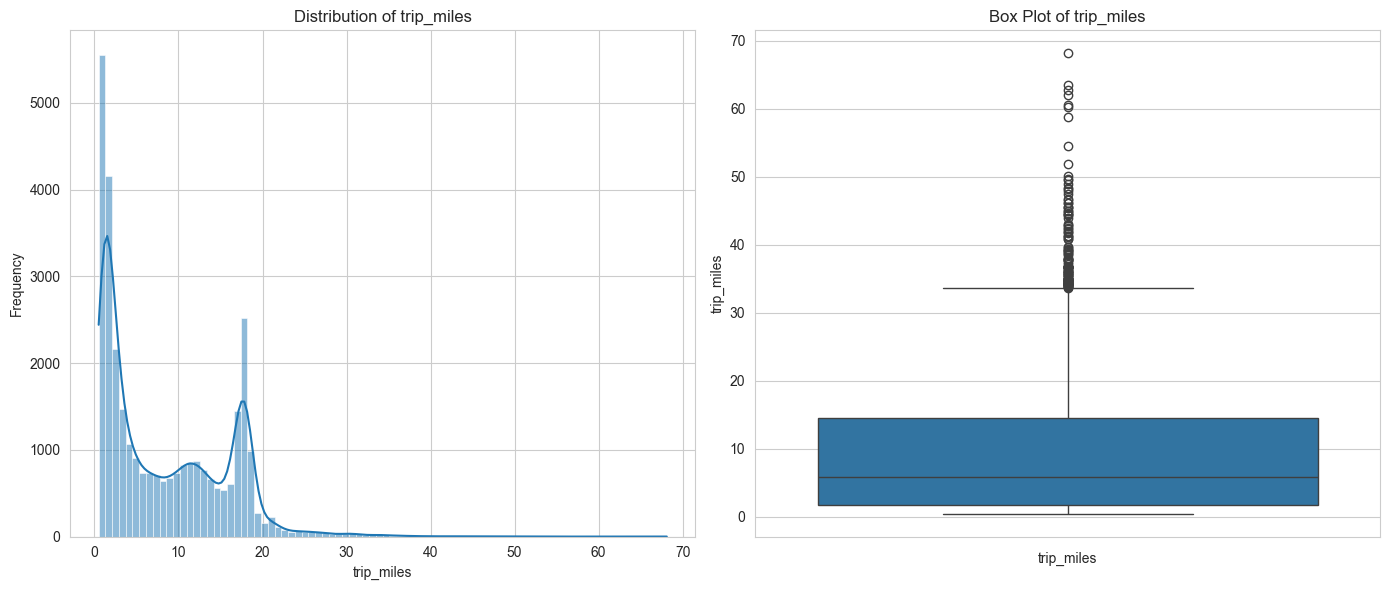

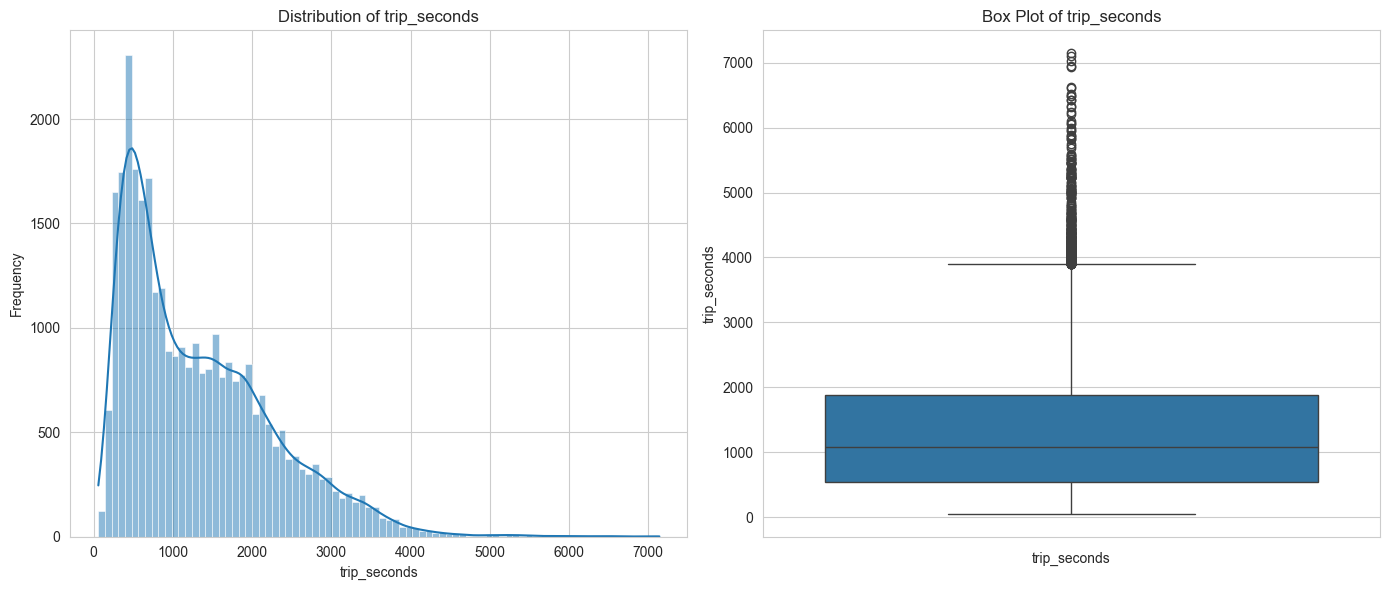

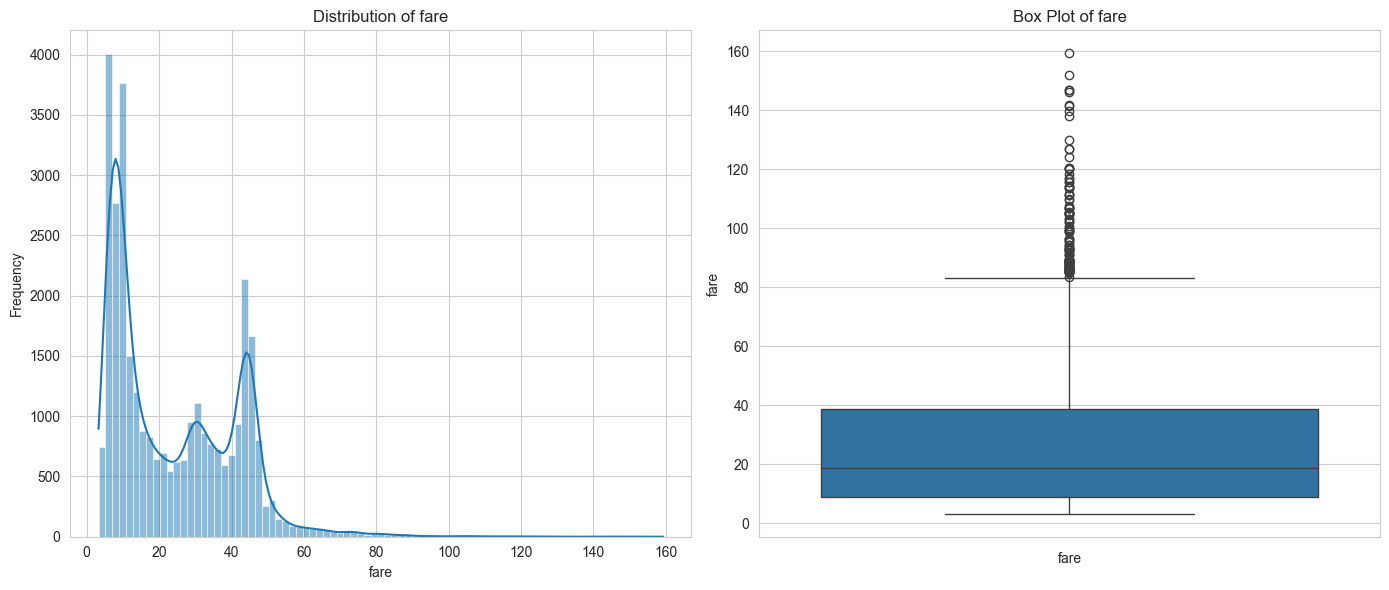

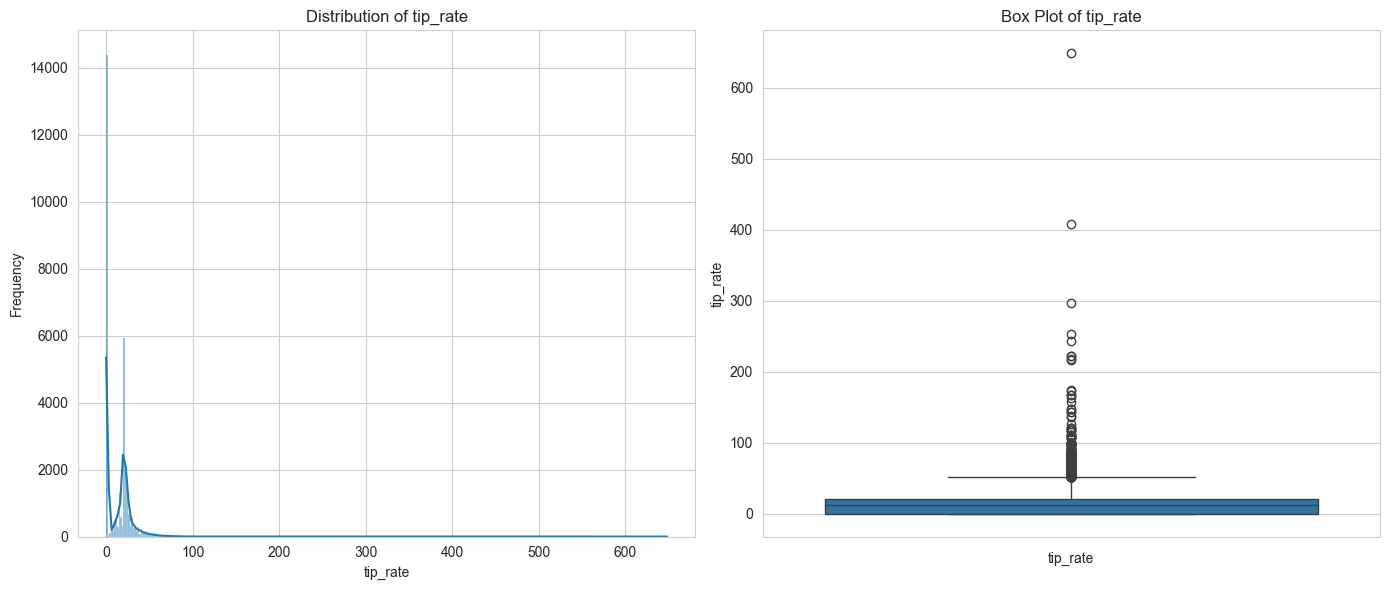

In [45]:
# Columns I want to visualize
cols_to_viz = ["trip_miles", "trip_seconds", "fare", "tip_rate"]

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Create histograms and box plots for each feature
for column in cols_to_viz:
    plt.figure(figsize=(14, 6))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(feature_data_df[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

    # Box plot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=feature_data_df[column])
    plt.title(f'Box Plot of {column}')
    plt.xlabel(column)

    plt.tight_layout()
    plt.show()

### Create Correlation Matrix

Visualize the correlation between numerical features to understand their relationships.

* Very Strong positive linear correlation between trip_miles and trip_seconds
* Very Strong positive linear correlation between trip_miles and trip fare
* very week negative linear correlation with tips and {trip_miles, trip_seconds, and trip_fare}


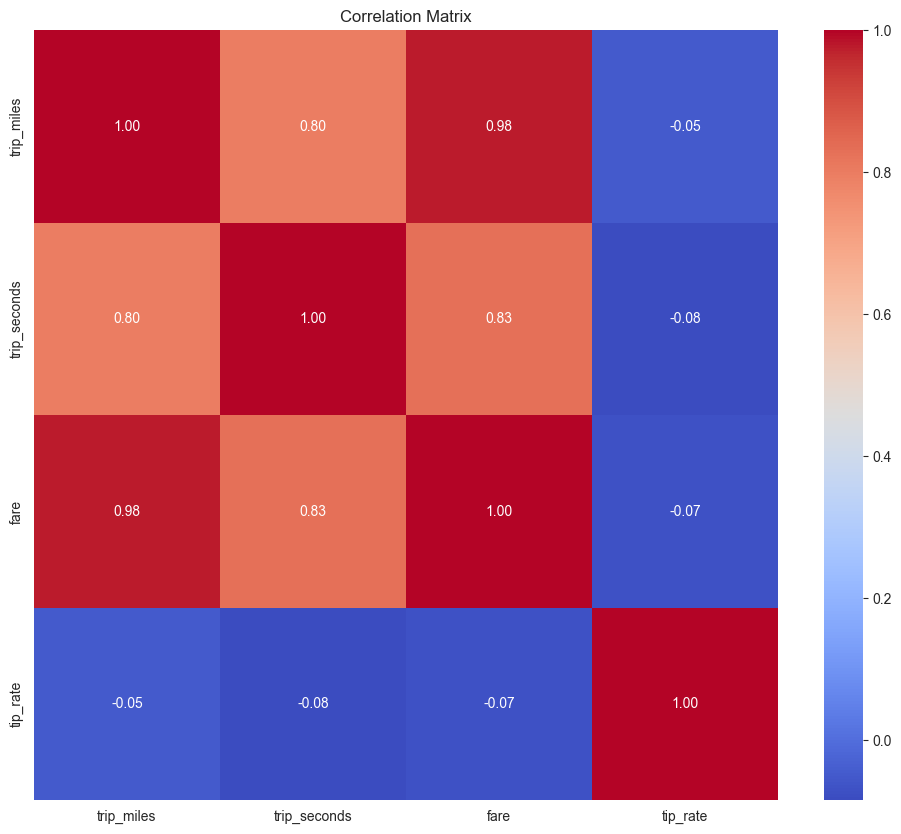

In [47]:
# Compute the correlation matrix
correlation_matrix = feature_data_df.corr(numeric_only=True)

# Use seaborn to visualize the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

---


# Save New Dataframe as CSV 

Let's store the new data for model creation 

In [48]:
PROCESSED_DATA_PATH = ("/Users/lancehester/Documents/ml_predict_taxi_fares/data/clean_taxi_data.csv")


feature_data_df.to_csv(PROCESSED_DATA_PATH, index=False)